In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import zipfile
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')


def SMA(S, L):
    n = np.size(S)
    M = np.zeros(n)
    for i in range(0, n):
        if i < L-1:
            M[i] = np.NaN
        else:
            M[i] = np.mean(S[i-L+1:i+1])
    return M


z = zipfile.ZipFile("D:\HISTDATA_COM_XLSX_EURUSD_M12018.zip")
z.extractall()

df = pd.read_excel('DAT_XLSX_EURUSD_M1_2018.xlsx', sheet_name='2018', header=None, names=[
    'DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume'])
# print(df.head(5))

df['MA1'] = SMA(df['Bar CLOSE Bid Quote'], 5)

df['MA2'] = df.rolling(window=10)['Bar CLOSE Bid Quote'].mean()
df['MA3'] = df.rolling(window=15)['Bar CLOSE Bid Quote'].mean()
df['MA4'] = df.rolling(window=30)['Bar CLOSE Bid Quote'].mean()

print(df.head(40))





        DateTime Stamp  Bar OPEN Bid Quote  Bar HIGH Bid Quote   
0  2018-01-01 17:00:00             1.20037             1.20100  \
1  2018-01-01 17:01:00             1.20083             1.20095   
2  2018-01-01 17:02:00             1.20035             1.20043   
3  2018-01-01 17:03:00             1.20041             1.20050   
4  2018-01-01 17:04:00             1.20049             1.20049   
5  2018-01-01 17:05:00             1.20050             1.20050   
6  2018-01-01 17:06:00             1.20050             1.20069   
7  2018-01-01 17:07:00             1.20048             1.20054   
8  2018-01-01 17:08:00             1.20051             1.20087   
9  2018-01-01 17:09:00             1.20082             1.20097   
10 2018-01-01 17:10:00             1.20094             1.20095   
11 2018-01-01 17:11:00             1.20084             1.20088   
12 2018-01-01 17:12:00             1.20088             1.20088   
13 2018-01-01 17:13:00             1.20080             1.20080   
14 2018-01

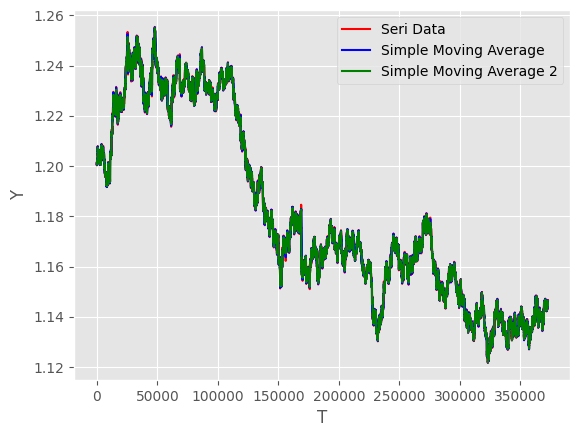

In [20]:
plt.style.use('ggplot')
plt.plot(df['Bar CLOSE Bid Quote'], label='Seri Data', c='r')
plt.plot( df['MA1'], label = 'Simple Moving Average ',
c = 'b')
plt.plot( df['MA4'], label = 'Simple Moving Average 2',
c = 'g')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.show()